# Bank Marketing Project

**Abstract:** 

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)



**Data Set Information:** 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#




**Attribute Information:**


***1. Bank client data:***

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')




***2. Related with the last contact of the current campaign:***

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



***3. Other attributes:***

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a 
previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure',
'nonexistent','success')




***4. Social and economic context attributes***

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)



***5. Output variable (desired target):*** 

y - has the client subscribed a term deposit? (binary: 'yes', 'no')*


In [58]:
from google.colab import drive
drive.mount('/content/drive')

#directory where our dataset present
data_dir = "/content/drive/My Drive/Colab Notebooks/Bank Marketing"

import os
print(os.listdir(data_dir)) #folders inside dataset directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['bank-additional-full.csv', 'bank-additional-names.txt']


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
data= pd.read_csv(data_dir+"/bank-additional-full.csv",sep = ';') #separator=; as per given csv file
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Hypothesis Questions:**

1.Are retired people more likely to subscribe for term deposits? This may be true as usually retired people prefer safe investments in form of fixed deposits rather than other risky investments.

2.Do salaried people prefer it more than business owners and entrepreneurs? This may be true as it is reasonable to think business people would invest money back into their business rather than putting it in banks.

3.Are married people more likely to subscribe for the term deposits? This may be true as married people often tend to ensure savings for their family.

4.If you already have loans, would you be less likely to subscribe to term deposits?

5.Are younger customers more likely to subscribe to a term deposit compared to old customers (age>60) ?




# **Exploratory Data Analysis:**

1. Brief Look at the Dataset
2. See the dataset shape.
3. See the variables datatypes.
4. Target Distribution.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We will do the appropriate conversion to numeric data before passing to our ML Models.

In [62]:
print(f'Data contains {data.shape[0]} samples and {data.shape[1]} variables')

#ID_col=
TARGET_COL='y'

#features = [c for c in data.columns if c not in [ID_COL, TARGET_COL]]
features = [c for c in data.columns if c not in [TARGET_COL]]
print(f'\nThe dataset contains {len(features)} input features')


Data contains 41188 samples and 21 variables

The dataset contains 20 input features


In [63]:
#Distribution of the Target Feature: 'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')

data[TARGET_COL].value_counts(normalize='True') #normalise='True' returns % according to frequency

no     0.887346
yes    0.112654
Name: y, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Distribution')

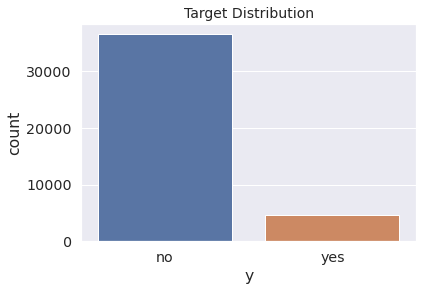

In [64]:
sns.countplot(data[TARGET_COL])
plt.title("Target Distribution", fontsize=14)

It is a highly imbalanced dataset which was expected as with every marketing campaign.

In [65]:
#Checking percentage of null values for each column
#null_values_per_variable = 100 * (data.isnull().sum()/data.shape[0]).round(3)#.reset_index()
#null_values_per_variable.sort_values(ascending=False)

In [66]:
#Check for Null Values
data[features].isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [67]:
#removal of duplicate rows
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(41188, 21)
(41176, 21)


There are no null values in any column.

In [68]:
#Checking Unique values in each variable
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

The features 'age', 'duration', 'campaign', 'pdays', contain a lot of unique values.

**Analyzing Each Variable & their Relationships**

For each feature type we will be perform two types of analysis:

Univariate: Analyze 1 feature at a time

Bivariate: Analyze the relationship of that feature with target variable, 'y'

In [69]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [70]:
#Segregating Categorical & Numerical Variables
cat_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']

num_cols = [c for c in features if c not in cat_cols]
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

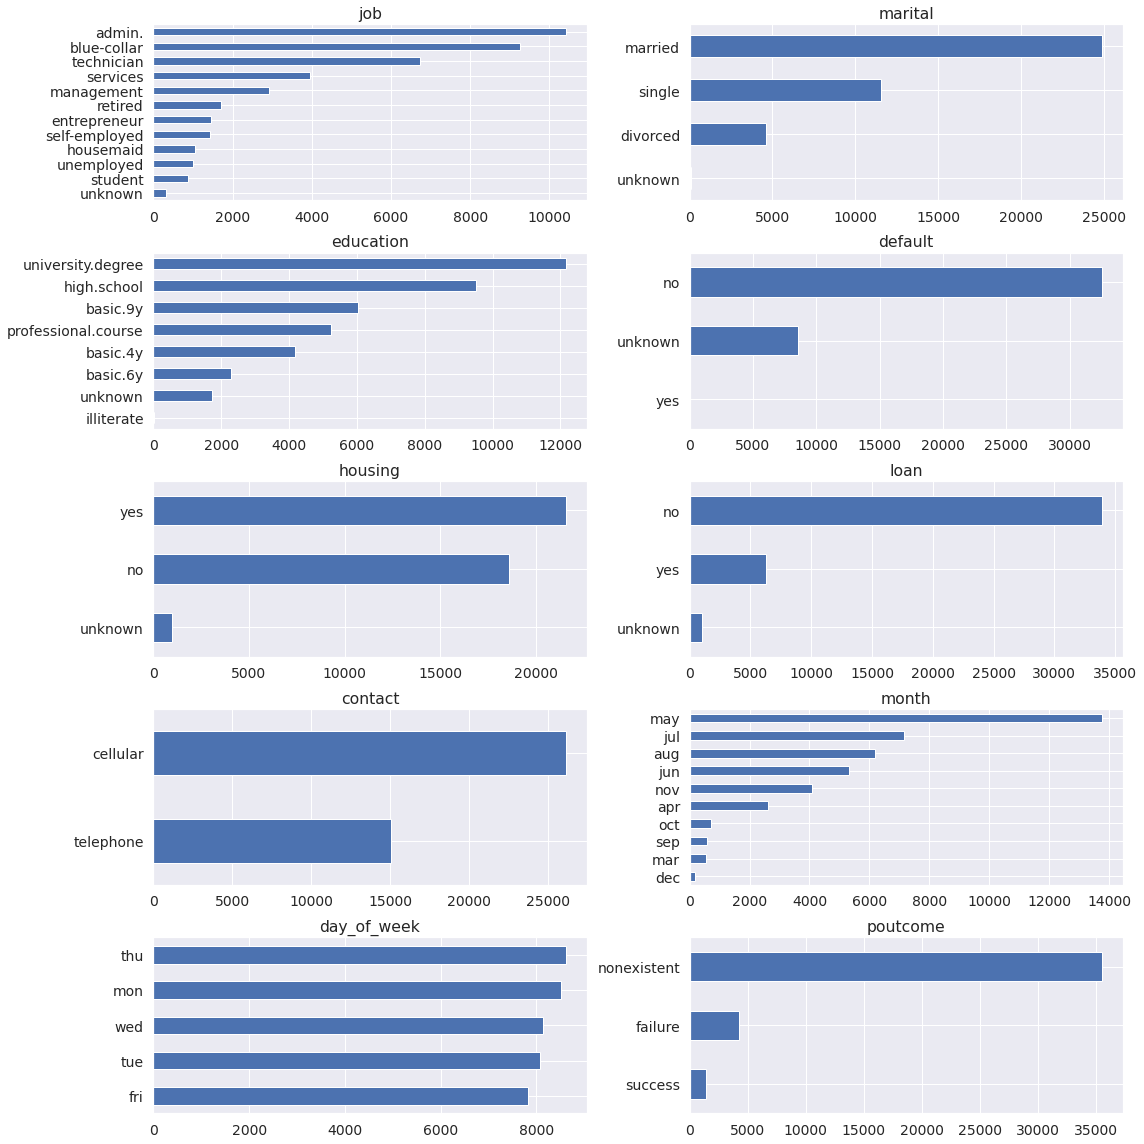

In [71]:
#Univariate Analysis of Categorical Features

#A way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable.

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(data[cat_cols]):
    _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

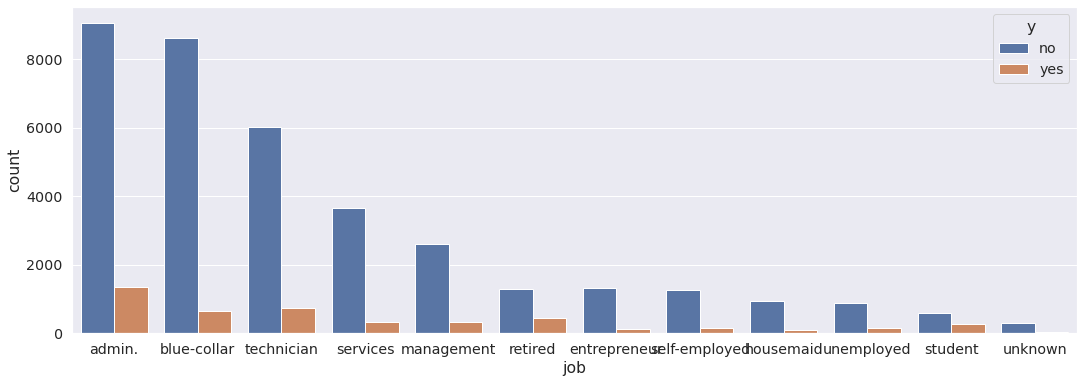

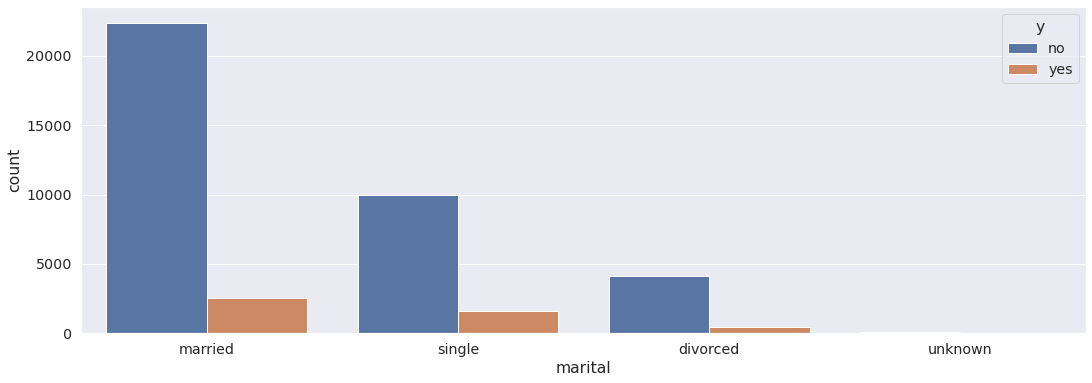

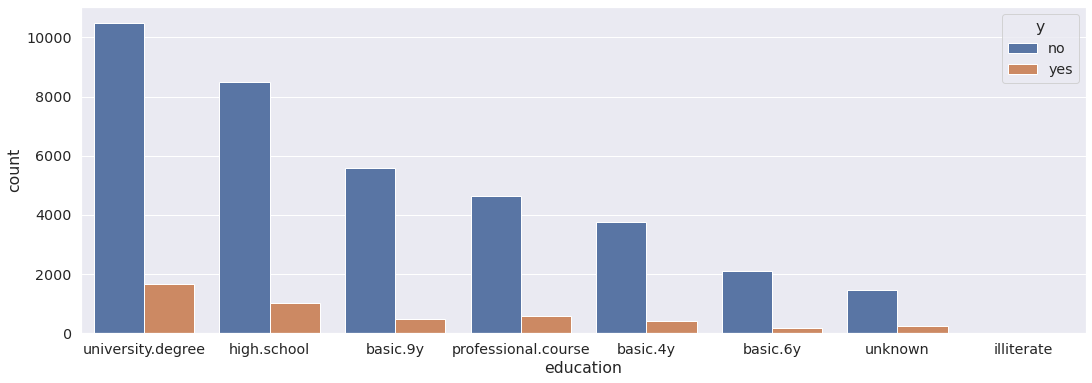

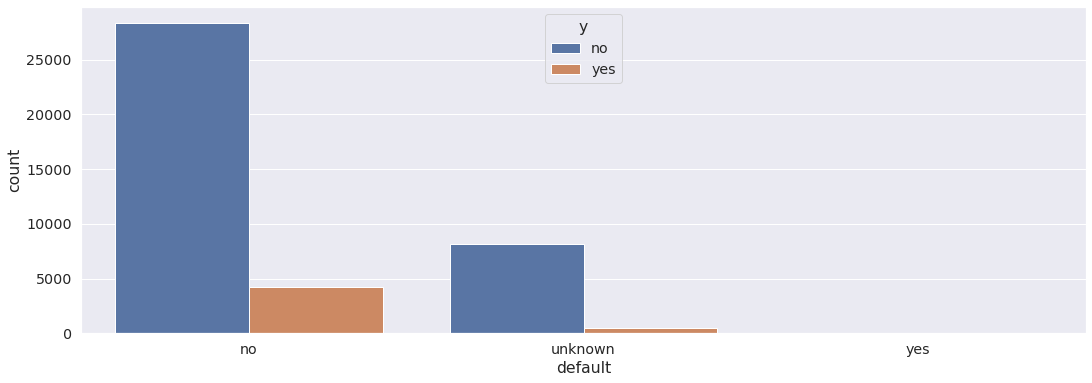

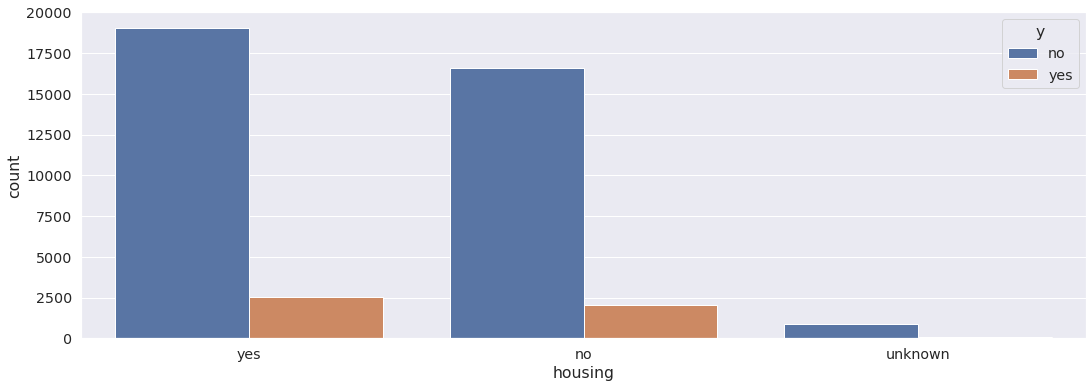

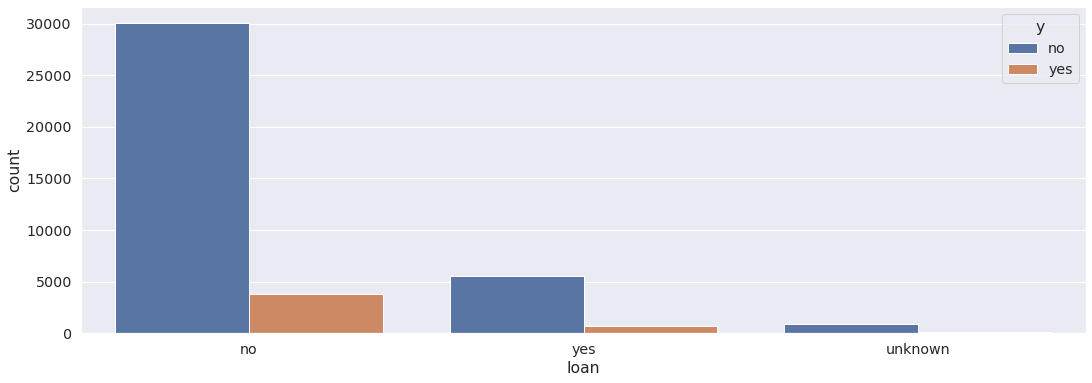

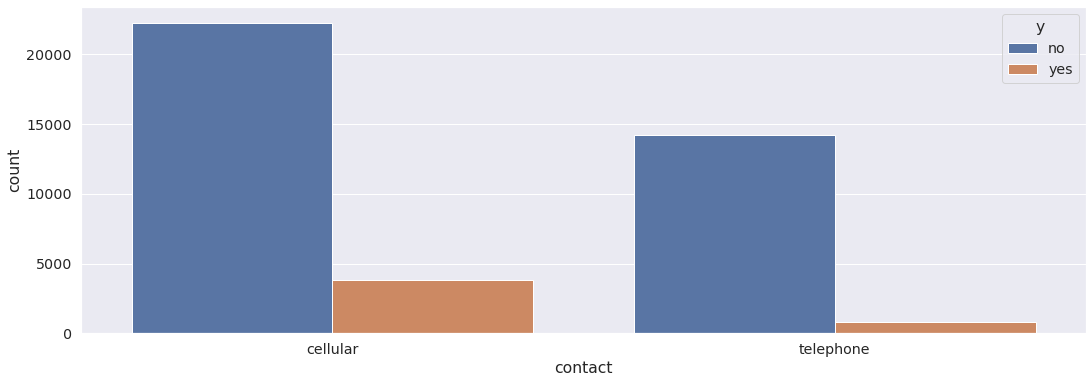

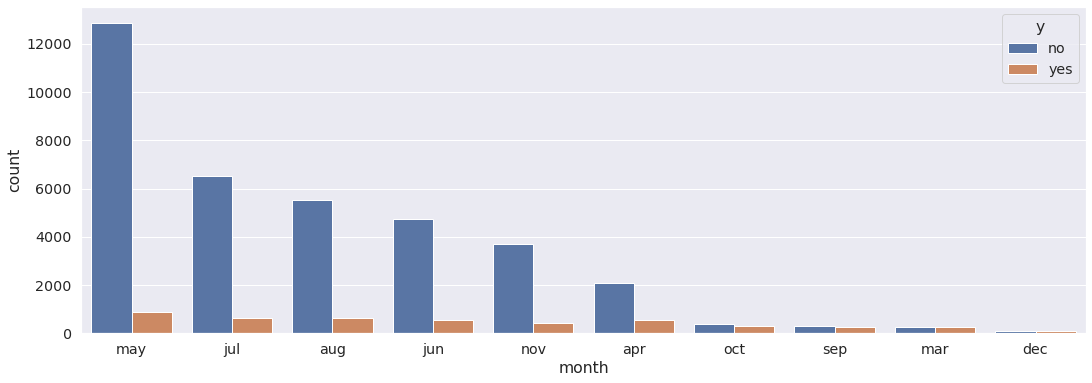

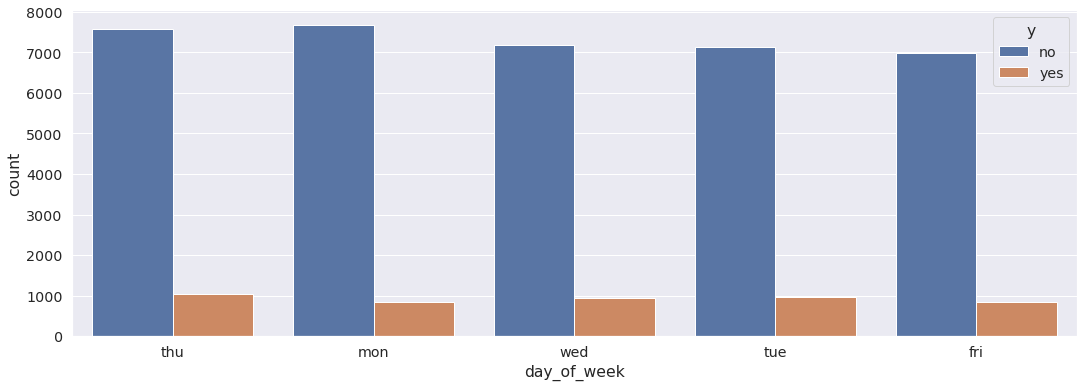

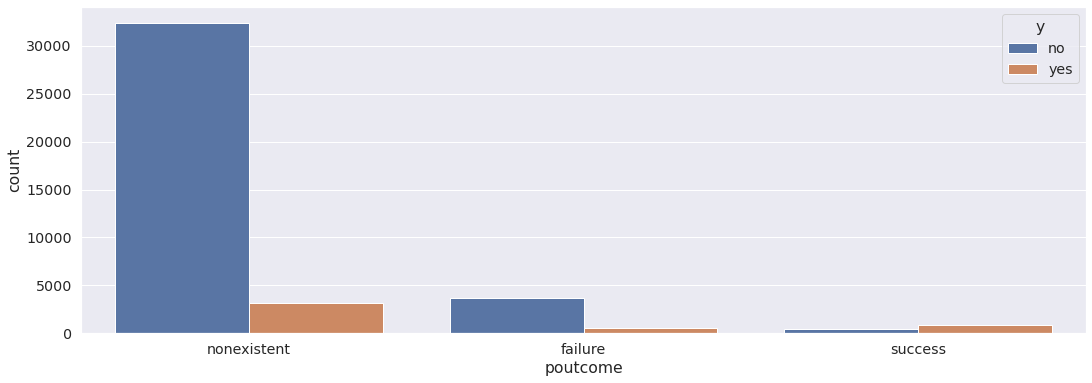

In [72]:
#Bivariate Analysis: Relationships of Categorical Features with Target


for c in cat_cols:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = data,order = data[c].value_counts().index) #individual bars sorted acc to frequency and then plotted


From the day_of_week plot, we can see that, all the days have the similar distribution for both the classes. Thus we won't be using it in predicting the target variable. We have dropped this feature before making our models below!

In [73]:
data1= data.copy()

data1['y'] = data1['y'].replace(['no','yes'],[0,1]) #needed to do below mathematical operations
data1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data1.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data1.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data1.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,275,875,31.4
5,retired,434,1718,25.3
10,unemployed,144,1014,14.2
0,admin.,1351,10419,13.0
4,management,328,2924,11.2
11,unknown,37,330,11.2
9,technician,730,6739,10.8
6,self-employed,149,1421,10.5
3,housemaid,106,1060,10.0
2,entrepreneur,124,1456,8.5


**Observations:**
Though the number of admin, blue collar, technician subscribers are more, we can also see that according to proportion, students and retired people are much more likely to subscribe to our term deposits!

In [74]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() #single or divorced

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 2531
No of Single (and divorced) clients who subscribe : 2096
Married clients campaign success rate: 10%
Single clients campaign success rate: 13%


**Observations:** Even though we have more clients who are married subscribers, If we look according to proportions, we see that single clients responded to the campaign better.

**Answering Hypothesis Questions:**



**1.Are senior (retired) people more likely to subscribe for term deposits? (they may prefer safe investments)**

**Observation**: No. The number of subscriptions by retired people are less. But We can see a positive result of the marketing campaign on senior people i.e 
the proprtion of yes/no is more for retired folks. [See table below]

Similarly, it is also interesting to see a very positive effect of the marketing campaign on students.


**2.Do salaried people prefer it more than business owners who would invest money into their business rather than putting in bank?**

**Observation**: Yes. Salaried People (admin, service, technician, blue collar jobs etc. ) are much more interested than entrepreneurs and self employed people.


**3.Are married people more likely to subscibe for term deposits? (They may prefer having savings for their children?)**

**Observation**: No, Proportion of single subscribers is more by 3%.


**4.If you already have loans, would you be less likely to subscibe to term deposits?**

**Observation:** People having personal loans subscribe less to the term deposits. The same is not true for people with home loans.



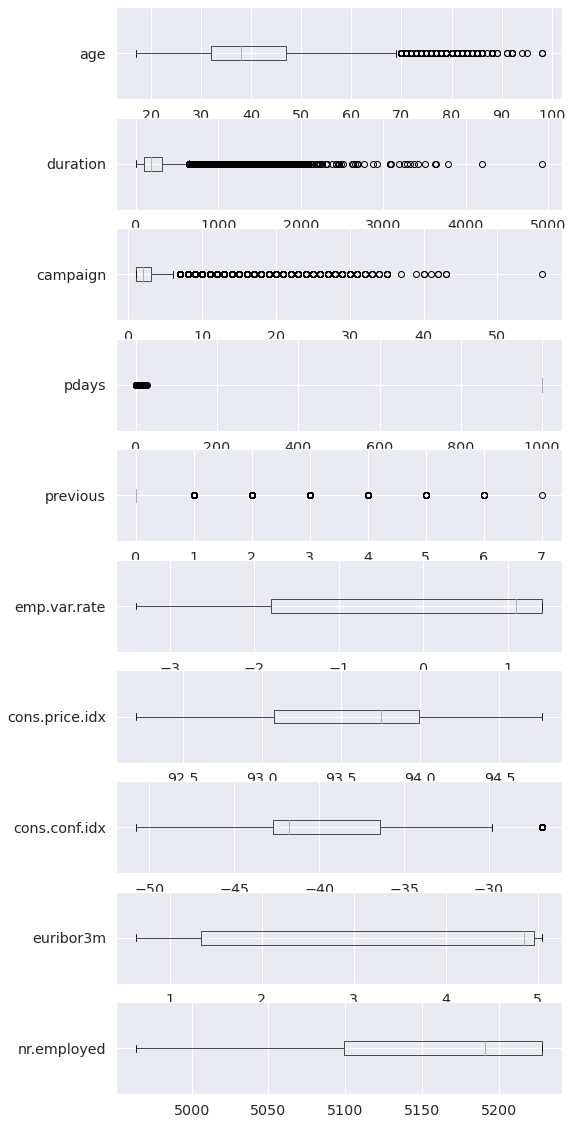

In [75]:
#Numerical Features


#Univariate Analysis using Boxplots
fig, axes = plt.subplots(10, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)

We can see some features are skewed and not normally distributed. The never contacted before respondents skew the variables “campaign” and “previous” towards zero. But it is not compulsary to make the features normally distributed, so we won't do that right now.

The boxplot of pdays looks so strange because most records have pdays as 999. The distribution of the number of days since the previous campaign (“pdays”) is skewed towards 1,000 because, for the respondents who were never contacted, the value is 999. The other values of pdays are very small comaparitively.

We have handled this feature in code below before building our models.

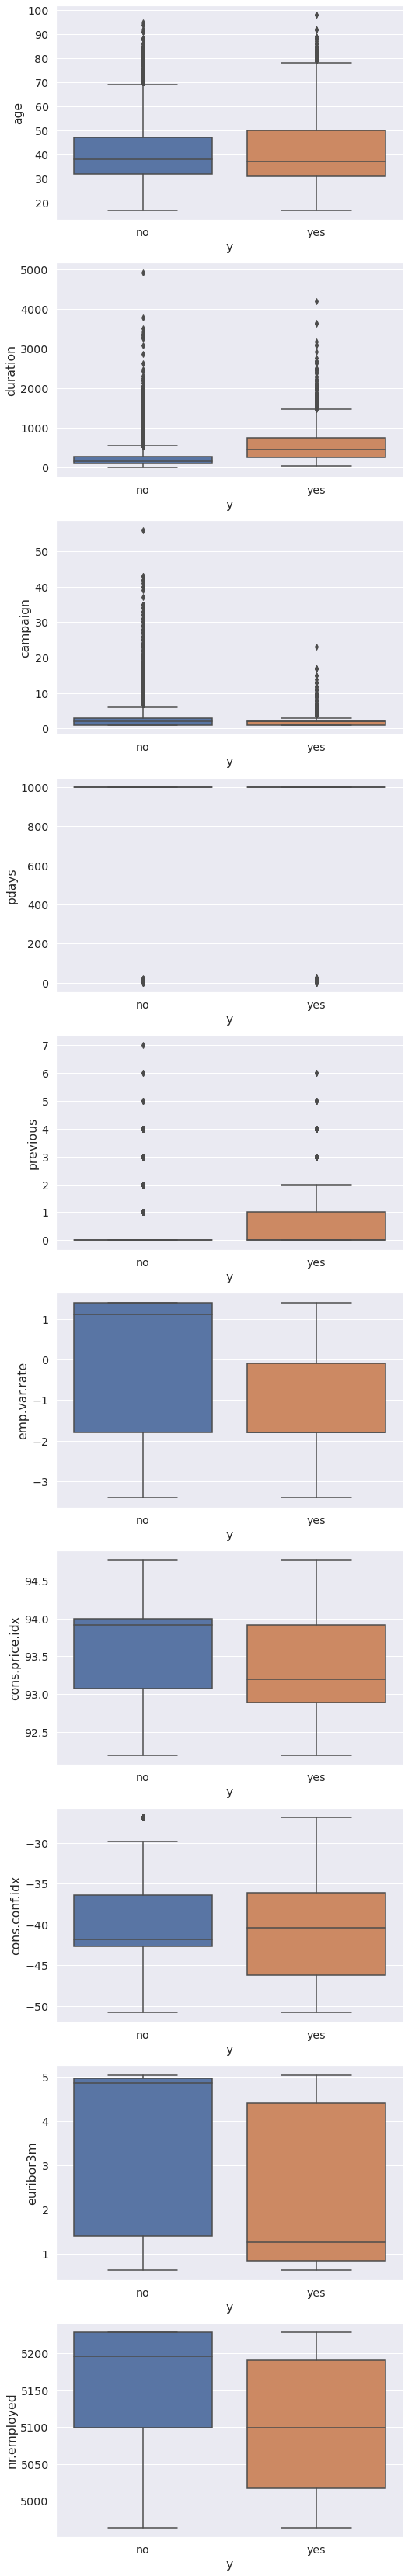

In [76]:
fig, axes = plt.subplots(10, 1, figsize=(8, 60))
for i, c in enumerate(num_cols):
  sns.boxplot(data=data,x='y',y=c,ax=axes[i])  

Observations: The boxplots for both the classes overlap quite a lot, which means that those particular features aren't necessarily a good indicator for which customer will subscribe and which customer will not.

But features like 'emp.var.rate' and 'euriborm3m' seem very useful as we can clearly see the difference in median for both the classes according to these features.

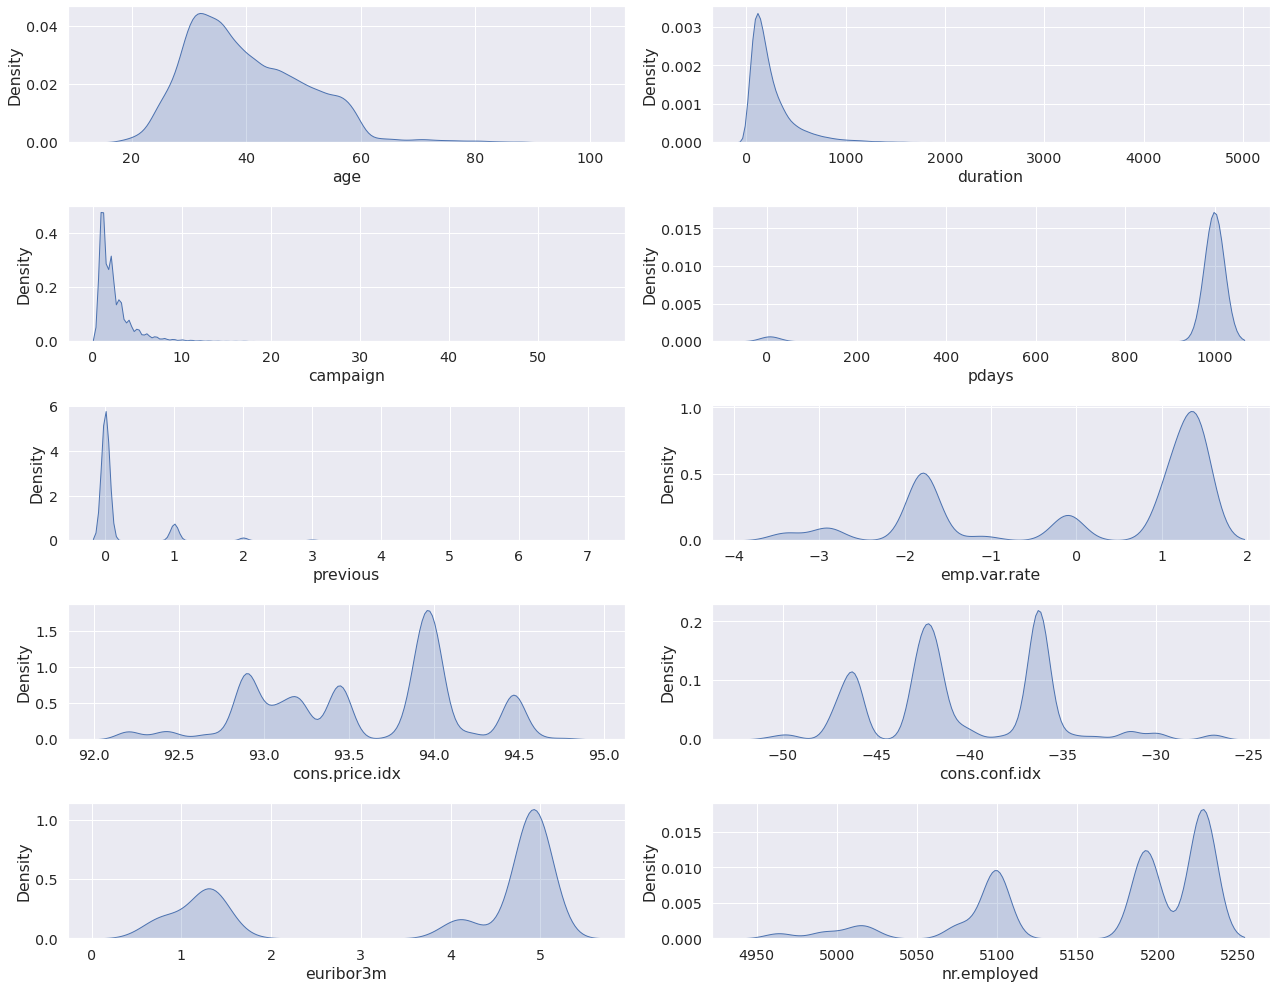

In [77]:
#Univariate Analysis using Density Plots

#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

We could confirm our observation about 'pdays' feature from its kde plot as well! 

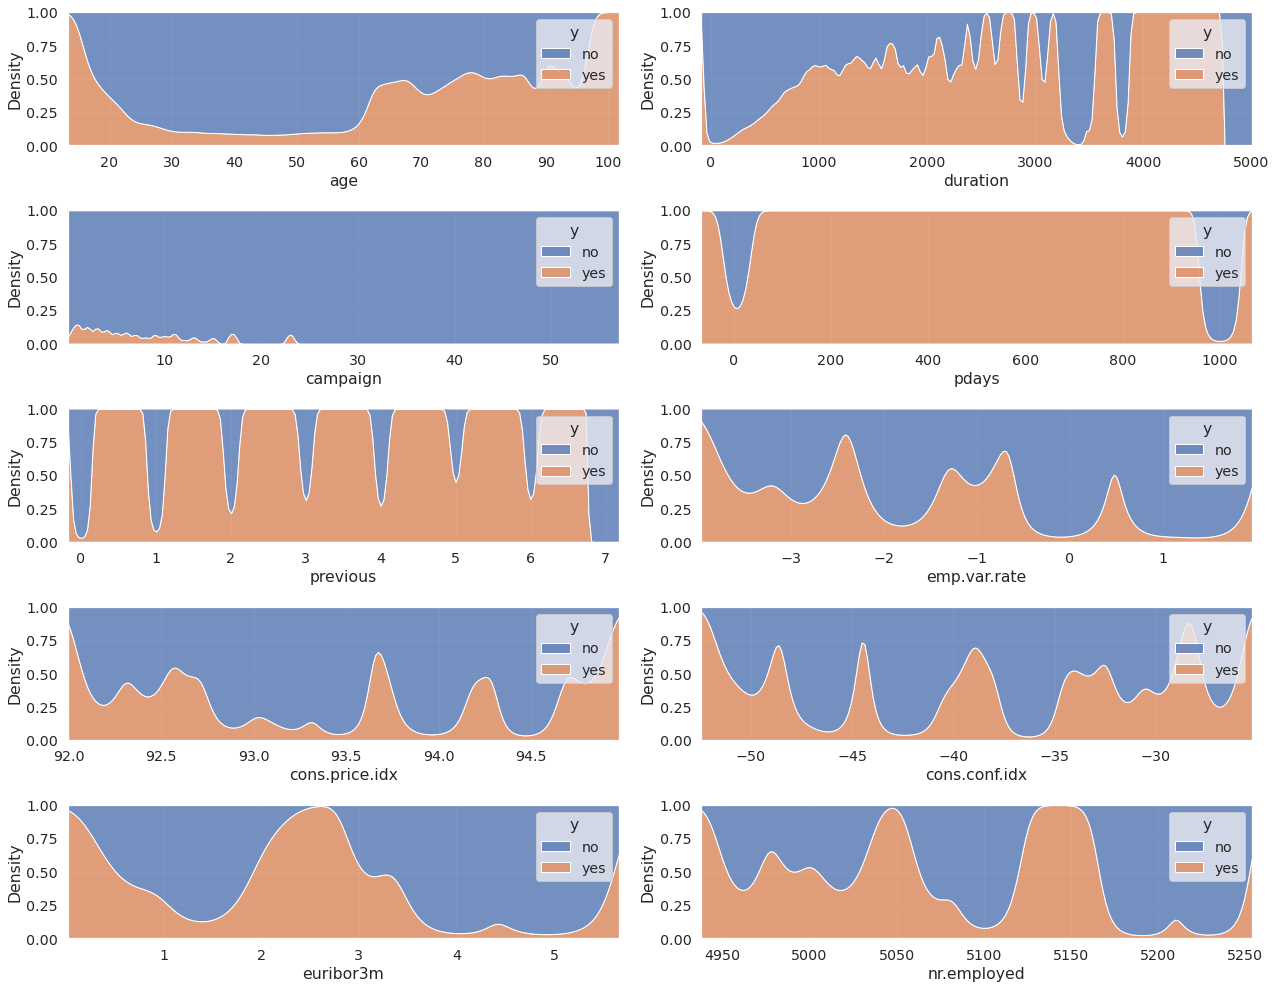

In [78]:
# Bivariate Analysis KDE plots - Relationships with Target Variable

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

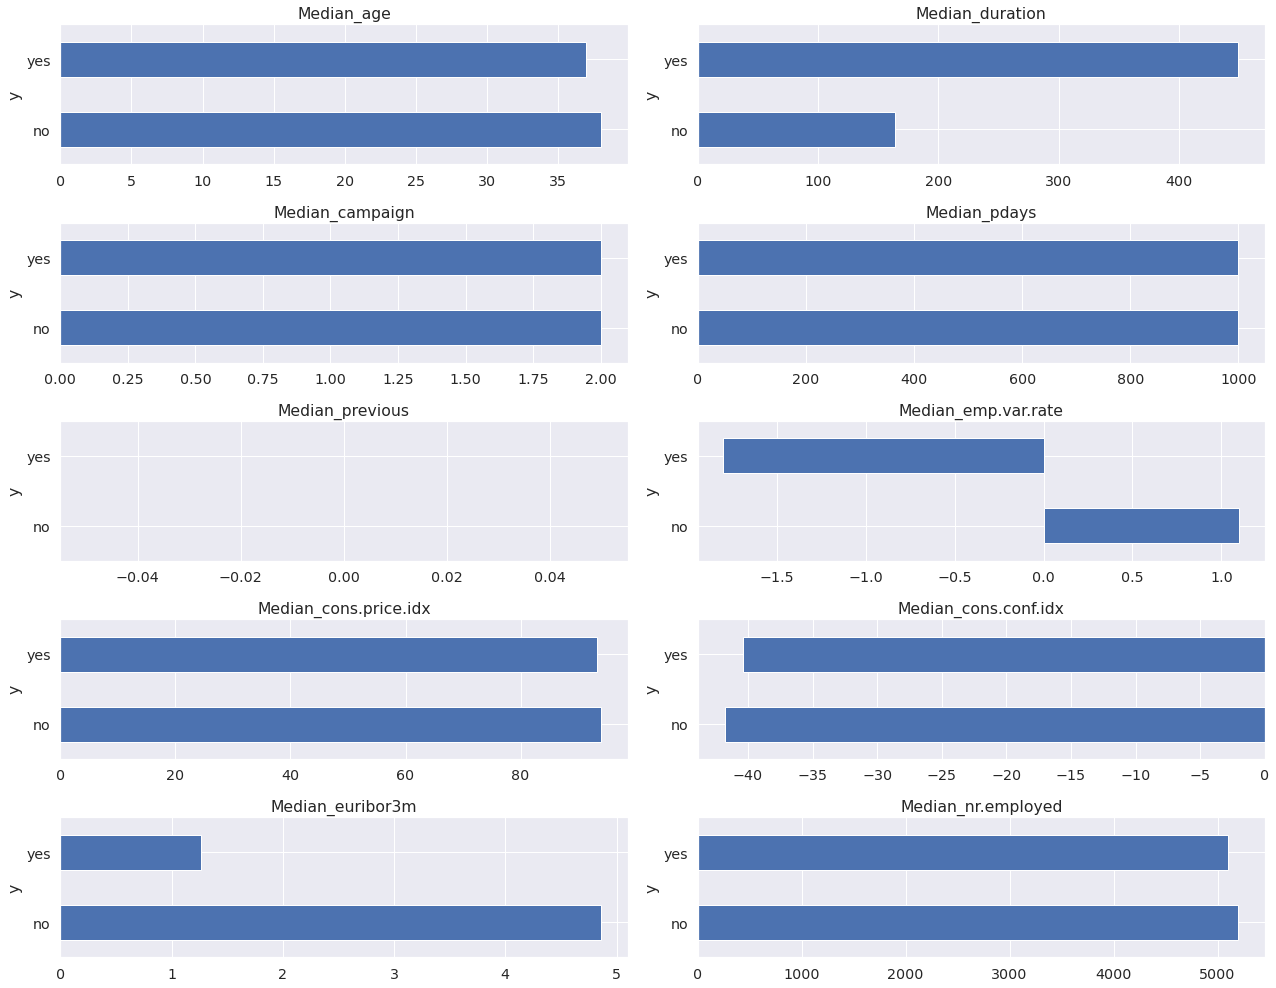

In [79]:
#For each numerical Variable. We will plot the median of the numerical variable for:
#1. When target col == 'no'
#2. when target col == 'yes'

#We are choosing median since median is not affected by outliers, and our data has outliers

sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = data.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()


5.Are younger customers more likely to subscribe to a term deposit compared to old customers ?

**Observation:** It's not very clear from our above plot since we have median age of around 37 for both cases.


In [80]:
n1=len(data[(data['age'] > 60) & (data['y'] == 'yes')]) #number of old subscribers
n2=len(data[(data['age'] > 60) & (data['y'] == 'no')]) #number of old non-subscribers
n3=len(data[(data['age'] <= 60) & (data['y'] == 'yes')]) #number of young subscribers
n4=len(data[(data['age'] <= 60) & (data['y'] == 'no')]) #number of young non-subscribers

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10492462810738322 and the proportion of old subscribers is 0.45544554455445546


It looks like effect of marketing on old people is much more positive than corresponding effect on young people! So old people can be a major group we would like to target!

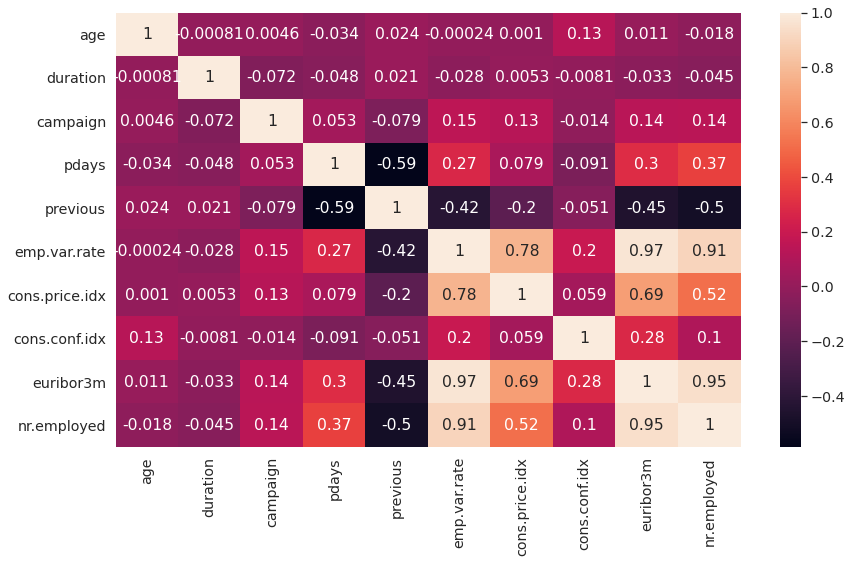

In [81]:
#Bivariate Analysis - Correlation Heatmaps

plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[num_cols].corr(), annot=True)

# Feature Engineering and Modelling

Baseline Models:

Model 1. (Predicting all instances as majority)

In [83]:
#As given in dataset description, we won't use 'duration' column. 
#Reason: We should note here the column “duration” has an interesting relationship with the target variable. If there were no phone calls (i.e. duration =0) then our target, y, has to be no. This will cause some unbalancing in the model and would inhibit the predictive power. In order to have a more realistic prediction, we will drop this column from our dataframe.

#We can't predict how long we gonna talk to the client (duration) and how many calls would require to get the answer about deposit (campaign), so let's drop these! 

data= data.drop(['duration','campaign'],axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [84]:
#replacing no and yes by 0 and 1 respectively as our target values!
data['y'] = data['y'].replace(['no','yes'],[0,1])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [85]:
feat = [c for c in data.columns if c not in [TARGET_COL]]
len(feat)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.33)
print(train.shape)
print(test.shape)


(27587, 19)
(13589, 19)


In [86]:
#Input to our model will be the features
train_X, test_X = train[feat], test[feat]

#Output of our model will be the TARGET_COL
train_y, test_y = train[TARGET_COL], test[TARGET_COL]


In [87]:
#As we saw before too, 0 ('no') is the majority class. Lets begin by predicting everything as 0 ('no').
preds_test = np.zeros(len(test_X))

#accuracy,f1 on test data 
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(test_y, preds_test)
f1 = f1_score(test_y, preds_test)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')


Accuracy score is: 0.8902789020531312
F1 score is: 0.0


In [88]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[12098     0]
 [ 1491     0]]


In [89]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5


We have to improve this F1-score and AUC Score by creating more intelligent models.

Model 2. (Random Predictions with equal probability)

In [90]:
#Since we are dealing with randomness, its important to set a seed, so we get same randomness everytime.
np.random.seed(2)

preds_test = np.random.choice([0, 1], size=len(test_y))

f1_score(test_y, preds_test)

0.18864292589027915

Still not an excellent score. We'll improve it as we build more models.

In [91]:
print("Confusion Matrix is:")
print(confusion_matrix(test_y, preds_test))

Confusion Matrix is:
[[6061 6037]
 [ 707  784]]


In [92]:
print("AUC on Test data is " +str(roc_auc_score(test_y,preds_test)))

AUC on Test data is 0.5134067478658251


3.More Intelligent Classification Models

In [93]:
train.shape, test.shape

((27587, 19), (13589, 19))

In [94]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24689,52,management,married,university.degree,no,no,no,telephone,nov,mon,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
14164,33,blue-collar,single,basic.4y,no,unknown,unknown,cellular,jul,mon,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
1772,28,blue-collar,single,basic.6y,no,no,no,telephone,may,fri,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
6590,47,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2388,47,admin.,married,university.degree,unknown,no,no,telephone,may,tue,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


In [95]:
#Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.
df = pd.concat([train, test], axis=0).reset_index(drop = True) #reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.
df.shape

(41176, 19)

In [96]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,52,management,married,university.degree,no,no,no,telephone,nov,mon,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,33,blue-collar,single,basic.4y,no,unknown,unknown,cellular,jul,mon,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2,28,blue-collar,single,basic.6y,no,no,no,telephone,may,fri,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
3,47,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,47,admin.,married,university.degree,unknown,no,no,telephone,may,tue,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


In [97]:
#let's remove these two categorical features which we think won't be useful in building our ML models
df.drop(['month','day_of_week'],axis=1,inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,52,management,married,university.degree,no,no,no,telephone,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
1,33,blue-collar,single,basic.4y,no,unknown,unknown,cellular,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2,28,blue-collar,single,basic.6y,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
3,47,blue-collar,married,basic.4y,unknown,yes,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,47,admin.,married,university.degree,unknown,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


Converting all Categorical Variables to numbers.

In [98]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26135
telephone    15041
Name: contact, dtype: int64
nonexistent    35551
failure         4

In [99]:
df.shape

(41176, 17)

In [100]:
#dropping rows with 'unknown' values for any categorical column.

index_names= df[(df.job == 'unknown') | (df.marital == 'unknown') | (df.education == 'unknown') | (df.default == 'unknown') | (df.housing == 'unknown') | (df.loan == 'unknown')].index
#print(index_names)
  
# drop these given row 
# indexes from dataFrame 
df.drop(index_names, inplace = True) 
df.shape

(30478, 17)

In [101]:
new_cat_cols=['job','marital','education','default','housing','loan','contact','poutcome']
for c in new_cat_cols:
  print(df[c].value_counts())

admin.           8734
blue-collar      5674
technician       5469
services         2856
management       2311
retired          1215
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64
married     17487
single       9439
divorced     3552
Name: marital, dtype: int64
university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: education, dtype: int64
no     30475
yes        3
Name: default, dtype: int64
yes    16516
no     13962
Name: housing, dtype: int64
no     25710
yes     4768
Name: loan, dtype: int64
cellular     20435
telephone    10043
Name: contact, dtype: int64
nonexistent    25826
failure         3461
success         1191
Name: poutcome, dtype: int64


Since number of categories for each column is low, we can use ONE HOT ENCODING.

In [102]:
df= pd.get_dummies(df,columns=new_cat_cols)
df.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,52,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0
2,28,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0
5,49,999,1,-1.8,93.075,-47.1,1.498,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0
6,34,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0
7,42,999,0,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0


In [103]:
df['pdays'].value_counts()

999    29168
3        381
6        363
4        102
2         53
9         53
12        50
7         50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
19         3
22         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

As we can see most records have pdays as 999. This means most records indicate the particular person was not contacted before. Let's convert this pdays column into a binary categorical column with 2 values: 0: pdays is 999 i.e person was not contacted and 1: pdays!=999 i.e person was contacted before.

In [104]:
#Syntax:
#df[new_column]=np.where(condition, value if condition is true, value if condition is false)

df['has_contacted'] = np.where(df['pdays']!= 999, True, False)

df.drop(['pdays'],axis=1,inplace=True)

df.head()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,has_contacted
0,52,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,False
2,28,0,1.1,93.994,-36.4,4.855,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,False
5,49,1,-1.8,93.075,-47.1,1.498,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,False
6,34,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,False
7,42,0,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,False


In [105]:
df= pd.get_dummies(df,columns=['has_contacted'])
df.head()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,has_contacted_False,has_contacted_True
0,52,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
2,28,0,1.1,93.994,-36.4,4.855,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0
5,49,1,-1.8,93.075,-47.1,1.498,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
6,34,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0
7,42,0,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0


In [106]:
features = [c for c in df.columns if c not in [TARGET_COL]]
len(features)

41

**Split the combined dataset after preprocessing into train and test sets.**

We will use 80-20 split with 80% of the rows belonging to training data. 

Stratified Sampling is necessary, since the dataset is highly imbalanced. **Stratified sampling ensures that the minority class is distributed proportionally among the two classes.**

In [107]:
trn, test = train_test_split(df, test_size=0.2, random_state = 1, stratify = df[TARGET_COL]) #stratified sampling
trn.shape, test.shape

((24382, 42), (6096, 42))

In [108]:
trn.head()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,has_contacted_False,has_contacted_True
40705,45,0,-0.1,93.200,-42.0,4.120,5195.8,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
6810,32,0,1.4,94.465,-41.8,4.961,5228.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
6010,34,1,-0.1,93.200,-42.0,4.120,5195.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1
23357,23,1,-1.8,92.893,-46.2,1.266,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1
39977,34,0,-1.8,93.075,-47.1,1.405,5099.1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0


In [109]:
#Input to our model will be the features
X_trn, X_test = trn[features], test[features]

#Output of our model will be the TARGET_COL
y_trn, y_test = trn[TARGET_COL], test[TARGET_COL]

**Performance Metrics for our Models:**

A classifier is only as good as the metric used to evaluate it. If we choose the wrong metric to evaluate our models, we are likely to choose a poor model, or in the worst case, be misled about the expected performance of your model.

Classification Accuracy should not be used as a metric for imbalanced classification. This is so because even if our model is not intelligent and just guesses all clients as the majority class "not subscribing to the term deposit", we will get a very high accuracy. 

When we want to give equal weight to both classes prediction ability we should look at the ROC curve. ROC Area Under Curve (AUC) Score is used as the metric for imbalanced data. ROC AUC score gets over the above described problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. Accuracy does not guarantee that.

We will also be seeing F1-Score as our secondary performance metric to analyze the performance of our models. What we are trying to achieve with the F1-score metric is to find an equal balance between precision and recall, which is extremely useful in most scenarios when we are working with imbalanced datasets.

3.1 Logistic Regression Model

In [110]:
#Standardize features (mainly numeric) by removing the mean and scaling to unit variance. This is necessary for Logistic Regression.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)
X_trn = scaler.transform(X_trn)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=7600,random_state = 1)
_ = lr.fit(X_trn, y_trn)

#predictions on test data
preds_test= lr.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.37204910292728993

In [112]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[5234   90]
 [ 575  197]]


In [113]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,5234,90,5324
1,575,197,772
All,5809,287,6096


In [114]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.6191383820649868


As we can see, we have improved performance by some amount.

3.2 Decision Tree Classifier

In [115]:
dt = DecisionTreeClassifier(random_state = 1)
_ = dt.fit(X_trn, y_trn)

#predictions on test data
preds_test= dt.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.32475247524752476

We need to do hyperparameter tuning to improve our performance. Hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.

**Random Search for Hyperparameter Tuning**

In random search we will run our model only a fixed number of times, say 10, and among these 10 runs we will return the best hyper-parameter combination. This may not be the optimal hyper-parameter combination. But, it saves much more time than Grid Search, so we will go for random search.

In [118]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

dt2 = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = dt2.fit(X_trn, y_trn)

search.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.6,
 'max_leaf_nodes': 32,
 'min_samples_split': 20}

In [119]:
optimal_params = {
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.6,
 'max_leaf_nodes': 32,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 3}}

dt2 = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = dt2.fit(X_trn, y_trn)


#predictions on test data
preds_test= dt2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.5093715545755237

**0.509**, So our performance has increased after hyperparameter tuning!

In [120]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[4744  580]
 [ 310  462]]


In [121]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,4744,580,5324
1,310,462,772
All,5054,1042,6096


In [122]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7447524748620967


3.3 Random Forrest Classifier

In [123]:
#creation of random forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1) #by default no of estimators=10
rf.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)


0.3734375

In [124]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [215]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

rf2 = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=30)

search = rf2.fit(X_trn, y_trn)

search.best_params_


{'class_weight': {0: 1, 1: 5},
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.6,
 'max_leaf_nodes': 64,
 'min_samples_split': 20}

In [125]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 0.6,
 'max_leaf_nodes': 64,
 'min_samples_split': 20,
 'class_weight': {0: 1, 1: 5}}

rf2 = RandomForestClassifier(random_state = 1, **optimal_params)
_ = rf2.fit(X_trn, y_trn)

#predictions on test data
preds_test= rf2.predict(X_test)

#f1 score on test set
f1_score(y_test, preds_test)

0.5177453027139876

In [126]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, preds_test))

Confusion Matrix is:
[[4676  648]
 [ 276  496]]


In [127]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,4676,648,5324
1,276,496,772
All,4952,1144,6096


In [128]:
print("AUC on Test data is " +str(roc_auc_score(y_test,preds_test)))

AUC on Test data is 0.7603870244430344


The performance is slightly improved over the Decision Tree Classifier.

In [129]:
#predictions on train data
preds_train= rf2.predict(X_trn)

#f1 score on train set
f1_score(y_trn, preds_train)


0.5208832136206438

In [130]:
#Auc on Train Data
print("AUC on Train data is " +str(roc_auc_score(y_trn,preds_train)))

AUC on Train data is 0.759153118978952


Thus we also checked that our Random Forrest model is not overfitting to train data!

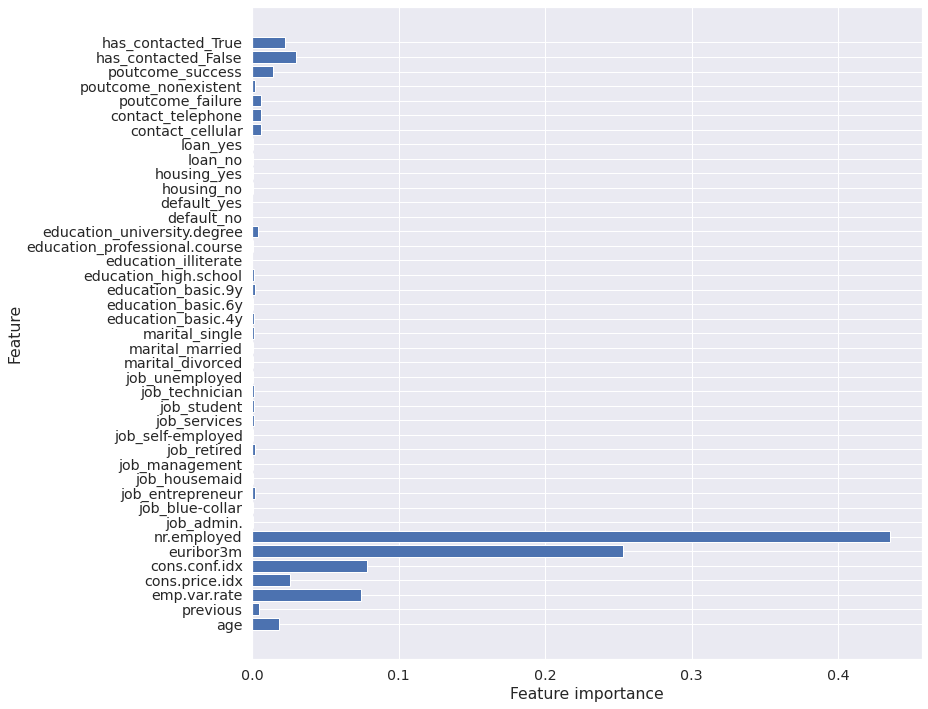

In [137]:
#Visualizing Feature Importance
def plot_feature_importances(model):
    n_features = X_trn.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), trn[features].columns.values) #trn.columns has list of all columns in our training data
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf2)    

From the graph we can see that numeric features had the maximum feature imprtance.

**Conclusion:**


In this project, we learned how to utilize Machine Learning to predict if a customer will subscribe to a bank's term deposit scheme through its marketing campaign. We found that tree based models like Decision Tree and Random Forrest are giving a good performance on this dataset. This is explainable as usually tree based models perform well when number of features are not that large. **The best performing model was the hyperparameter tuned Random Forrest Model with F1 score of 0.517 and ROC_AUC score of 0.760 on the test dataset.**